In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traintest/train.csv
/kaggle/input/traintest/test.csv


# Importing the Data

In [78]:
df_train=pd.read_csv('/kaggle/input/traintest/train.csv')
df_test= pd.read_csv('/kaggle/input/traintest/test.csv')

In [79]:
df_train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [80]:
df_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [81]:
df_train.describe(include='all')

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152,43152,43152,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,17203,9060,10428,NaN,NaN,NaN,NaN,NaN,NaN
mean,21576.500000,0.797855,NaN,NaN,NaN,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,NaN,NaN,NaN,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000


#### Train data is clean and has no skewness except in the price column where the prices are highl right skewed and need transformation.

In [82]:
df_test.describe(include='all')

,Id,carat,cut,color,clarity,depth,table,x,y,z
count,10788.000000,10788.000000,10788,10788,10788,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4348,2232,2637,NaN,NaN,NaN,NaN,NaN
mean,5394.500000,0.798279,NaN,NaN,NaN,61.758315,57.452531,5.729514,5.732559,3.539398
std,3114.371686,0.475700,NaN,NaN,NaN,1.421266,2.236933,1.123736,1.115090,0.695483
min,1.000000,0.200000,NaN,NaN,NaN,54.000000,50.000000,0.000000,0.000000,0.000000
25%,2697.750000,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.720000,4.727500,2.910000
50%,5394.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.520000
75%,8091.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000


#### Test data is clean and there is no skewness, because the values of the mean is too close to the values in the median in all columns.

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


#### There are no missing values in train data

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


#### There are no missing values in test data

# Data Cleaning and EDA

<AxesSubplot: xlabel='price', ylabel='Count'>

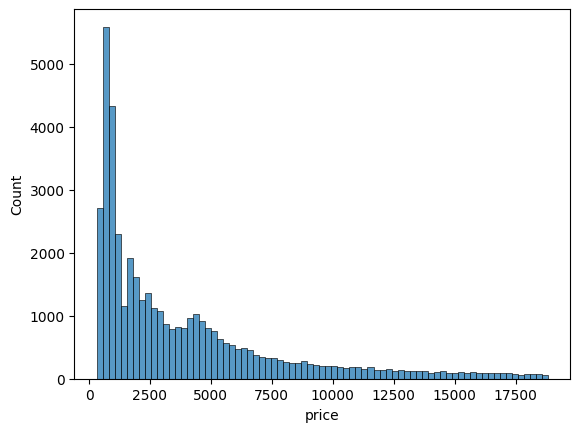

In [85]:
sns.histplot(data=df_train,x='price')
# A histogram of the price column

#### The prices are highly right skewed.
#### One way of making it less skewed and more normally destributed is to log transform the column

In [86]:
df_train['log_price']=np.log(df_train['price'])

In [87]:
df_train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,log_price
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,8.359369
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,9.626679
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,6.719013
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,7.363280
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,7.861727


<AxesSubplot: xlabel='log_price', ylabel='Count'>

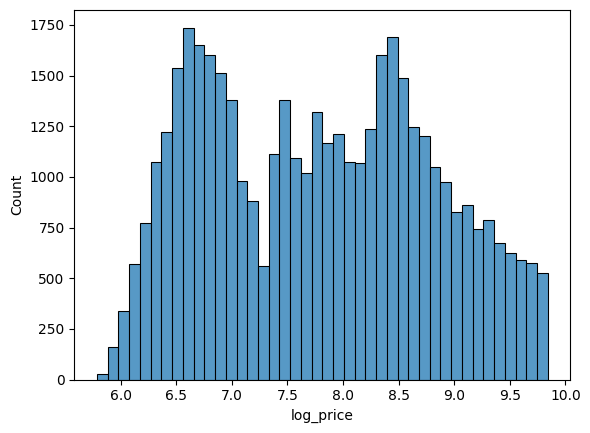

In [88]:
sns.histplot(data=df_train,x='log_price')
# A histogram of the log_price column

<AxesSubplot: xlabel='carat', ylabel='Count'>

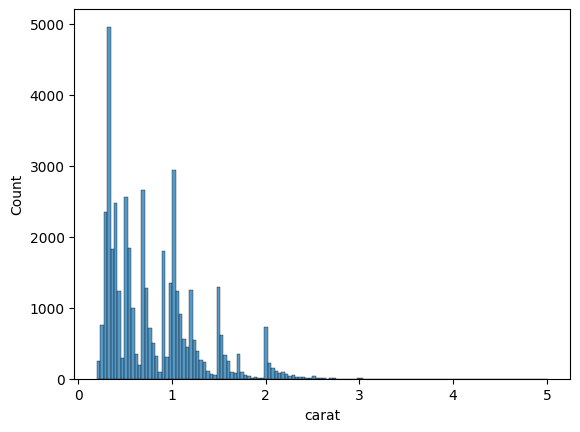

In [89]:
sns.histplot(data=df_train,x="carat")
# A histogram of the carat column

<AxesSubplot: xlabel='depth', ylabel='Count'>

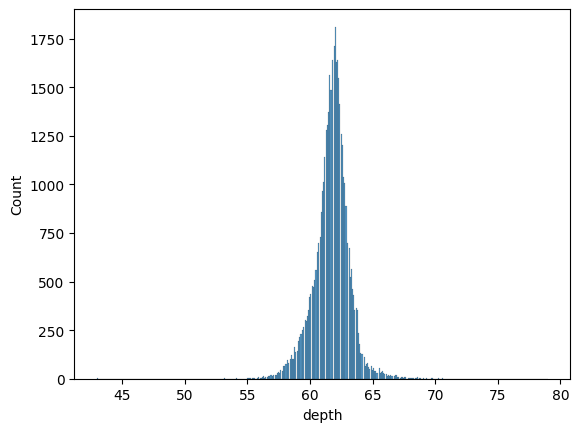

In [90]:
sns.histplot(data=df_train,x="depth")
# A histogram of the depth column

<AxesSubplot: xlabel='table', ylabel='Count'>

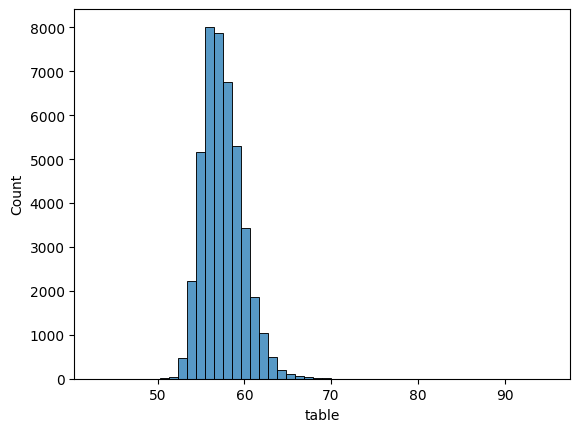

In [91]:
sns.histplot(data=df_train,x="table",bins=50)
# A histogram of the table column

In [218]:
def drop_outliers (df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    condition=(df[column] > q1-1.5*iqr) & (df[column]<q3+1.5*iqr)
    return df[condition]

In [219]:
df_train=drop_outliers(df_train,'x')
df_train=drop_outliers(df_train,'y')
df_train=drop_outliers(df_train,'z')
df_train=drop_outliers(df_train,'carat')


In [220]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39466 entries, 0 to 43151
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               39466 non-null  int64  
 1   carat            39466 non-null  float64
 2   cut              39466 non-null  object 
 3   color            39466 non-null  object 
 4   clarity          39466 non-null  object 
 5   depth            39466 non-null  float64
 6   table            39466 non-null  float64
 7   price            39466 non-null  int64  
 8   x                39466 non-null  float64
 9   y                39466 non-null  float64
 10  z                39466 non-null  float64
 11  log_price        39466 non-null  float64
 12  cut_encoded      39466 non-null  int64  
 13  color_encoded    39466 non-null  int64  
 14  clarity_encoded  39466 non-null  int64  
dtypes: float64(7), int64(5), object(3)
memory usage: 4.8+ MB


<AxesSubplot: xlabel='x', ylabel='Count'>

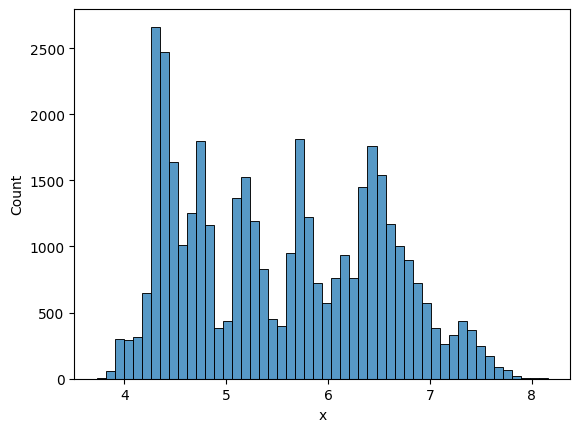

In [221]:
sns.histplot(data=df_train,x="x",bins=50)
# A histogram of the x column

<AxesSubplot: xlabel='y', ylabel='Count'>

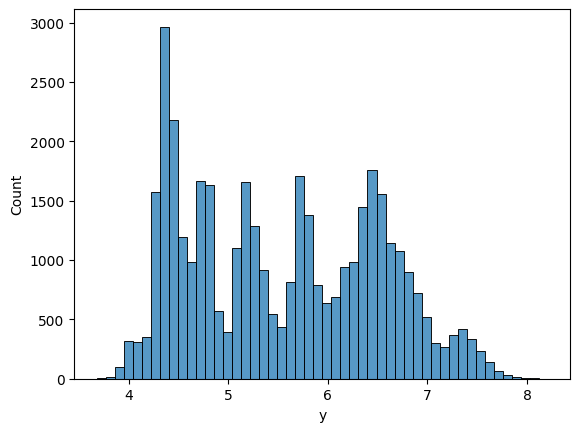

In [222]:
sns.histplot(data=df_train,x="y",bins=50)
# A histogram of the y column

<AxesSubplot: xlabel='z', ylabel='Count'>

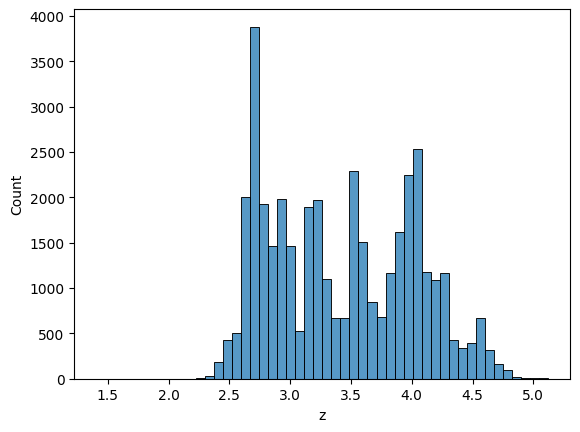

In [223]:
sns.histplot(data=df_train,x="z",bins=50)
# A histogram of the z column

/tmp/ipykernel_31/32805090.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


<AxesSubplot: >

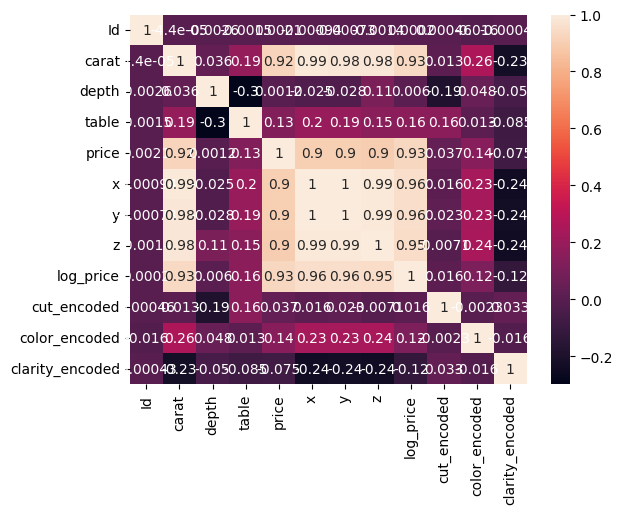

In [224]:
sns.heatmap(df_train.corr(),annot=True)
# A correlation matrix represents the continuous variables 

We see that carat, x, y, and z are highly correlated with log_price

<AxesSubplot: xlabel='cut', ylabel='count'>

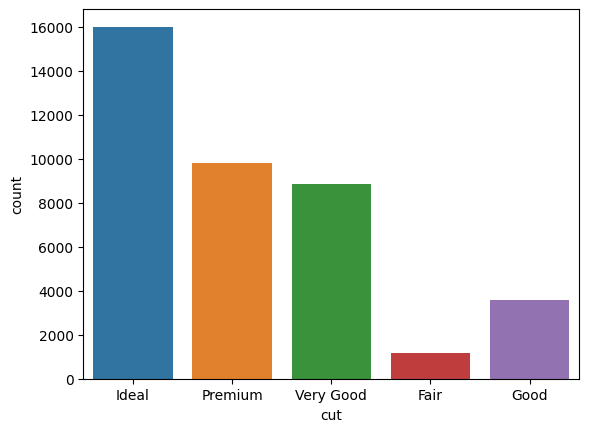

In [225]:
sns.countplot(data=df_train,x='cut')
# A count plot represents the cuts

<AxesSubplot: xlabel='color', ylabel='count'>

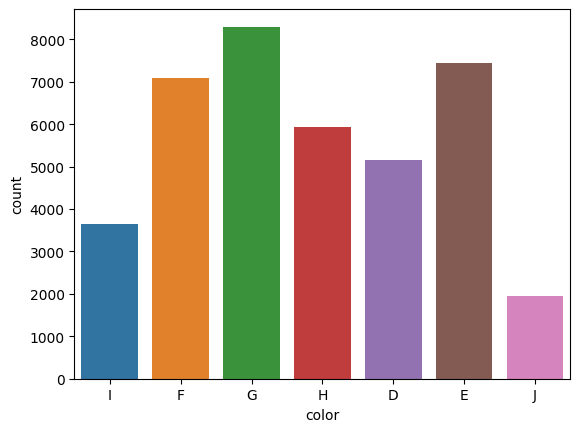

In [226]:
sns.countplot(data=df_train,x='color')
# A count plot represents the colors

<AxesSubplot: xlabel='clarity', ylabel='count'>

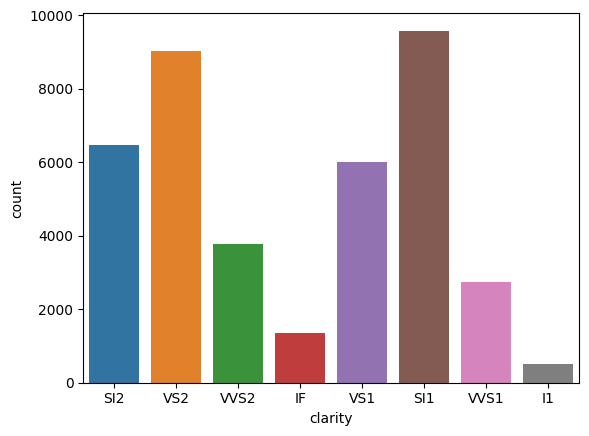

In [227]:
sns.countplot(data=df_train,x='clarity')
# A count plot represents the clarities

In [228]:
df_pivot=df_train.pivot_table(values='price',index='color',columns='cut',aggfunc='mean',sort=True)

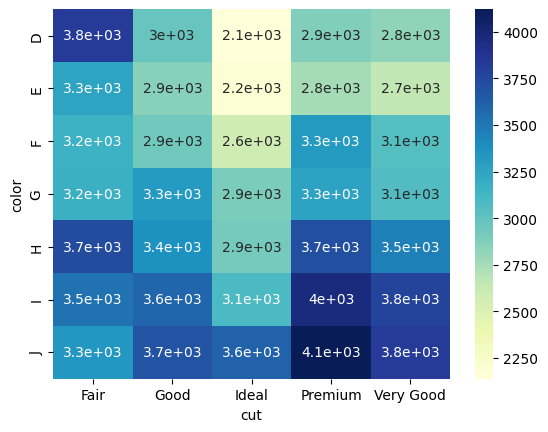

In [229]:
swarm_plot = sns.heatmap(df_pivot, cmap="YlGnBu", annot=True, cbar=True)
plt.show()

(0.0, 9.466009574864026)

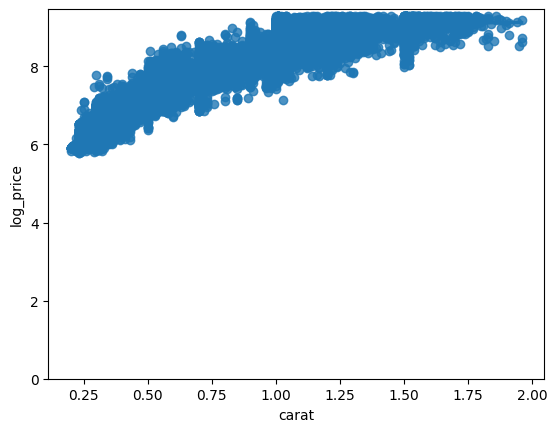

In [230]:
sns.regplot(data=df_train,x='carat',y='log_price',order=3)
plt.ylim(0)

In [231]:
df_train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,cut_encoded,color_encoded,clarity_encoded
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,8.359369,2,5,3
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,6.719013,2,2,5
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,7.363280,2,3,5
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,7.861727,3,4,7
5,6,0.90,Very Good,G,IF,63.1,58.0,5670,6.18,6.09,3.87,8.642944,4,3,1


# Data Preprocessing

In [232]:
from sklearn.preprocessing import OrdinalEncoder
# define data
data=df_train[['cut']]
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)
df_train['cut_encoded']= result.astype(int)

[[2.]
 [2.]
 [2.]
 ...
 [3.]
 [3.]
 [2.]]


In [233]:
df_train.head(5)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,cut_encoded,color_encoded,clarity_encoded
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,8.359369,2,5,3
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,6.719013,2,2,5
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,7.363280,2,3,5
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,7.861727,3,4,7
5,6,0.90,Very Good,G,IF,63.1,58.0,5670,6.18,6.09,3.87,8.642944,4,3,1


In [234]:
data=df_train[['color']]
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)
df_train['color_encoded']= result.astype(int)
df_train[['color','color_encoded']].head(20)

[[5.]
 [2.]
 [3.]
 ...
 [5.]
 [1.]
 [3.]]


,color,color_encoded
0,I,5
2,F,2
3,G,3
4,H,4
5,G,3
6,F,2
7,F,2
8,D,0
9,G,3
10,E,1


In [235]:
df_train.color.value_counts()

G    8296
E    7438
F    7082
H    5923
D    5146
I    3637
J    1944
Name: color, dtype: int64

In [236]:
data=df_train[['clarity']]
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)
df_train['clarity_encoded']= result.astype(int)

[[3.]
 [5.]
 [5.]
 ...
 [6.]
 [4.]
 [5.]]


In [237]:
data=df_test[['cut']]
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)
df_test['cut_encoded']= result.astype(int)

data=df_test[['color']]
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)
df_test['color_encoded']= result.astype(int)

data=df_test[['clarity']]
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)
df_test['clarity_encoded']= result.astype(int)

[[2.]
 [3.]
 [4.]
 ...
 [2.]
 [3.]
 [3.]]
[[3.]
 [1.]
 [5.]
 ...
 [1.]
 [1.]
 [2.]]
[[7.]
 [5.]
 [4.]
 ...
 [6.]
 [3.]
 [3.]]


In [238]:
df_train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,cut_encoded,color_encoded,clarity_encoded
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,8.359369,2,5,3
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,6.719013,2,2,5
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,7.363280,2,3,5
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,7.861727,3,4,7
5,6,0.90,Very Good,G,IF,63.1,58.0,5670,6.18,6.09,3.87,8.642944,4,3,1


<AxesSubplot: >

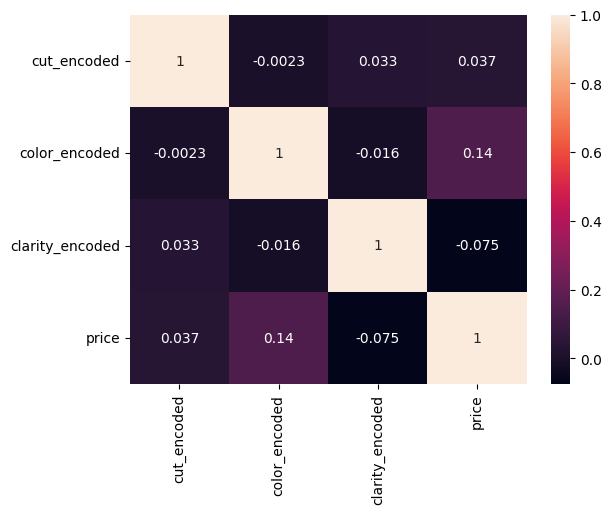

In [239]:
sns.heatmap(df_train[['cut_encoded','color_encoded','clarity_encoded','price']].corr(),annot=True)

<AxesSubplot: xlabel='cut_encoded', ylabel='price'>

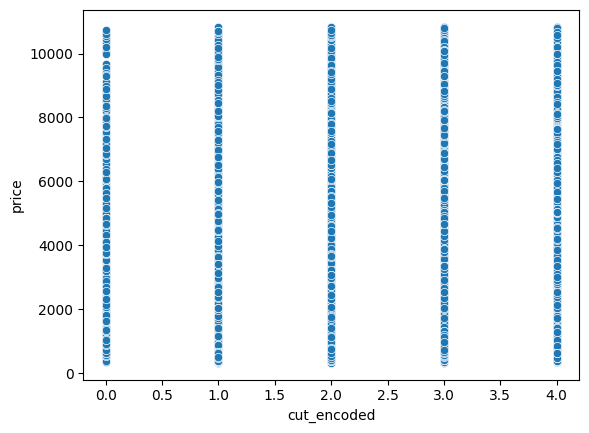

In [240]:
sns.scatterplot(data=df_train,x='cut_encoded',y='price')

<AxesSubplot: xlabel='color', ylabel='log_price'>

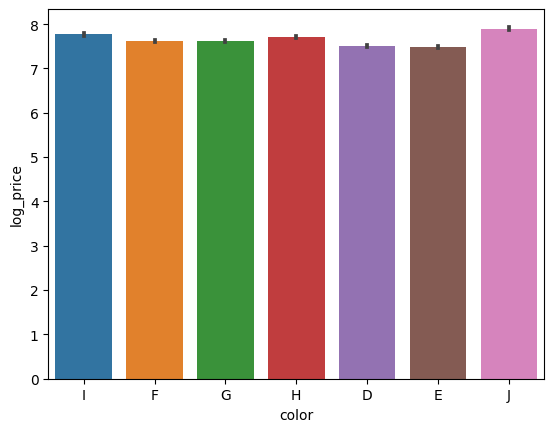

In [241]:
sns.barplot(data=df_train,x='color',y='log_price')

<AxesSubplot: xlabel='cut', ylabel='log_price'>

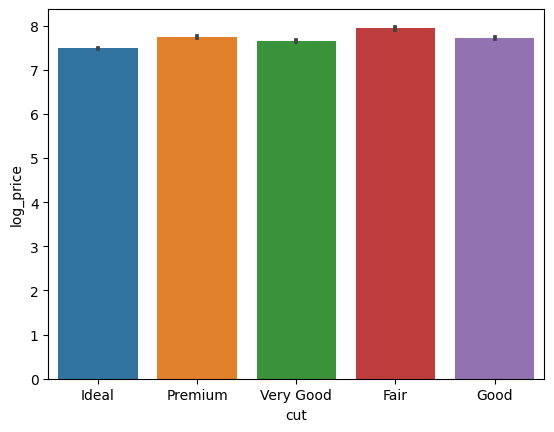

In [242]:
sns.barplot(data=df_train,x='cut',y='log_price')

<AxesSubplot: xlabel='clarity', ylabel='log_price'>

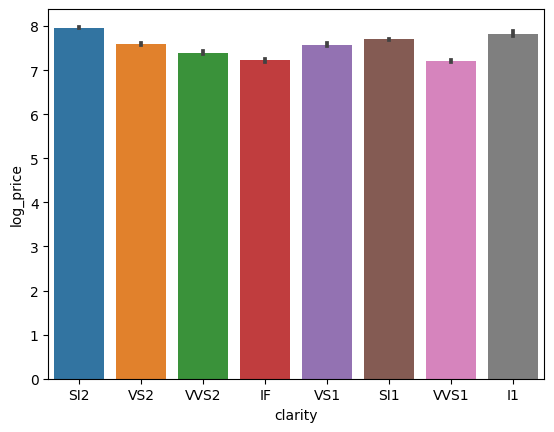

In [243]:
sns.barplot(data=df_train,x='clarity',y='log_price')

In [244]:
df_model_training=df_train[['carat','x','y','z','cut_encoded','color_encoded','clarity_encoded','depth','table']]
df_target= df_train['price']

In [252]:
# from sklearn.linear_model import LinearRegression
# lr=LinearRegression()
# lr.fit(df_model_training,df_target)
# yhat= lr.predict(df_model_training)

# from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scaled=scale.fit_transform(df_model_training)
# ridge=Ridge(alpha=1)
# ridge.fit(x_train_scaled,df_target)
# yhat=ridge.predict(x_train_scaled)
# from sklearn.tree import DecisionTreeRegressor
# decision_tree = DecisionTreeRegressor(min_samples_split=8,min_samples_leaf=5,max_depth=5,max_features='sqrt')

# # Train the model
# decision_tree.fit(x_train_scaled, df_target)

# # Predict on the test set
# yhat = decision_tree.predict(x_train_scaled)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
random_forest = RandomForestRegressor(n_estimators=200, max_depth=40,min_samples_split=2,min_samples_leaf=4,random_state=4244)
# scores = cross_val_score(random_forest, x_train_scaled, df_target, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = np.sqrt(-scores)
random_forest.fit(x_train_scaled, df_target)

# # Predict on the test set
yhat = random_forest.predict(x_train_scaled)
# print("Cross-Validation RMSE Scores:", rmse_scores)

# # Calculate mean RMSE score
# mean_rmse = np.mean(rmse_scores)
# print("Mean RMSE:", mean_rmse)

/tmp/ipykernel_31/4183237311.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g= sns.distplot(df_target,hist=False,label='actual')
/tmp/ipykernel_31/4183237311.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat,hist=False,ax=g,label='predicted')


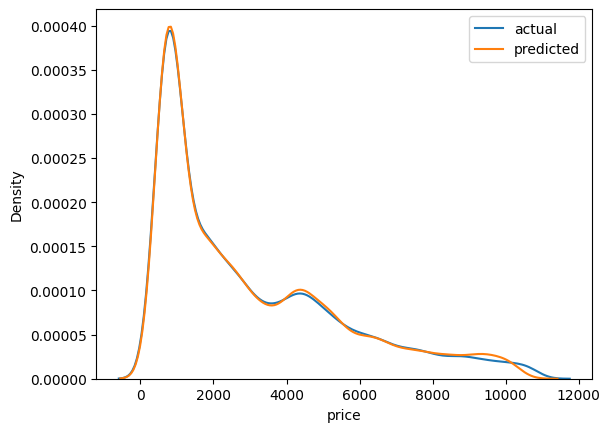

In [253]:
g= sns.distplot(df_target,hist=False,label='actual')
sns.distplot(yhat,hist=False,ax=g,label='predicted')

plt.legend()
plt.show()

In [254]:
x_test=df_test[['carat','x','y','z','cut_encoded','color_encoded','clarity_encoded','depth','table']]
scaled_test=scale.transform(x_test)
#y_test=ridge.predict(scaled_test)
y_test = random_forest.predict(scaled_test)


In [255]:
df_test['price']=y_test


In [256]:
test= df_test[['Id','price']]


In [257]:
test.head(15)
test.to_csv('testdata1.csv',index=False)

In [258]:
test.head()

,Id,price
0,1,946.544496
1,2,2883.487629
2,3,864.950261
3,4,2765.272065
4,5,1075.776847
